# Exercise 3 – Displaying and Summarizing Data

Notebook Written By: WDY (Yale-NUS '24) 
(Come say hi at https://www.linkedin.com/in/dys-profile/)

### Introduction

We will be working with a dataset on the aftermath of the Titanic. Let's read the data into the notebook first. Following that, let's do a quick look through of the dataset to find any interesting information.

In [3]:
titanic <- read.csv("C:/Users/Admin/OneDrive/Documents/Yale-NUS/Quantitative Reasoning/Quantitative Reasoning Repository/Exercise 3 - History of the Titanic/titanic.csv")

In [4]:
dim(titanic)
head(titanic)
str(titanic)

print(paste("Column Names:", names(titanic)))

[1] 2208   11

fam_name,given_name,gender,age,class,survived,ticket,pax_on_tckt,pnd,shl,pnc
ABBING,Anthony,Male,41,3rd,FALSE,5547,1,7,11,0
ABBOTT,Ernest Owen,Male,21,Crew,FALSE,NA,NA,NA,NA,NA
ABBOTT,Eugene Joseph,Male,13,3rd,FALSE,CA2673,3,20,5,0
ABBOTT,Rossmore Edward,Male,16,3rd,FALSE,CA2673,3,20,5,0
ABBOTT,Rhoda Mary 'Rosa',Female,39,3rd,TRUE,CA2673,3,20,5,0
ABELSETH,Kalle (Karen) Marie Kristiane,Female,16,3rd,TRUE,348125,1,7,13,0


'data.frame':	2208 obs. of  11 variables:
 $ fam_name   : Factor w/ 1517 levels "ABBING","ABBOTT",..: 1 2 2 2 2 3 3 4 4 6 ...
 $ given_name : Factor w/ 1578 levels " Augustus George",..: 141 475 497 1311 1263 937 1179 1321 119 831 ...
 $ gender     : Factor w/ 2 levels "Female","Male": 2 2 2 2 1 1 2 2 1 2 ...
 $ age        : int  41 21 13 16 39 16 25 30 28 45 ...
 $ class      : Factor w/ 4 levels "1st","2nd","3rd",..: 3 4 3 3 3 3 3 2 2 3 ...
 $ survived   : logi  FALSE FALSE FALSE FALSE TRUE TRUE ...
 $ ticket     : Factor w/ 927 levels "10482","110152",..: 882 NA 922 922 922 663 660 572 572 390 ...
 $ pax_on_tckt: int  1 NA 3 3 3 1 1 2 2 1 ...
 $ pnd        : int  7 NA 20 20 20 7 7 24 24 7 ...
 $ shl        : int  11 NA 5 5 5 13 13 0 0 4 ...
 $ pnc        : int  0 NA 0 0 0 0 0 0 0 6 ...
 [1] "Column Names: fam_name"    "Column Names: given_name" 
 [3] "Column Names: gender"      "Column Names: age"        
 [5] "Column Names: class"       "Column Names: survived"   
 [7] "Column Name

## Step 1: What was the distribution of passengers' ages abroad the Titanic?

Let's use a histogram to better see the distribution of passengers age.

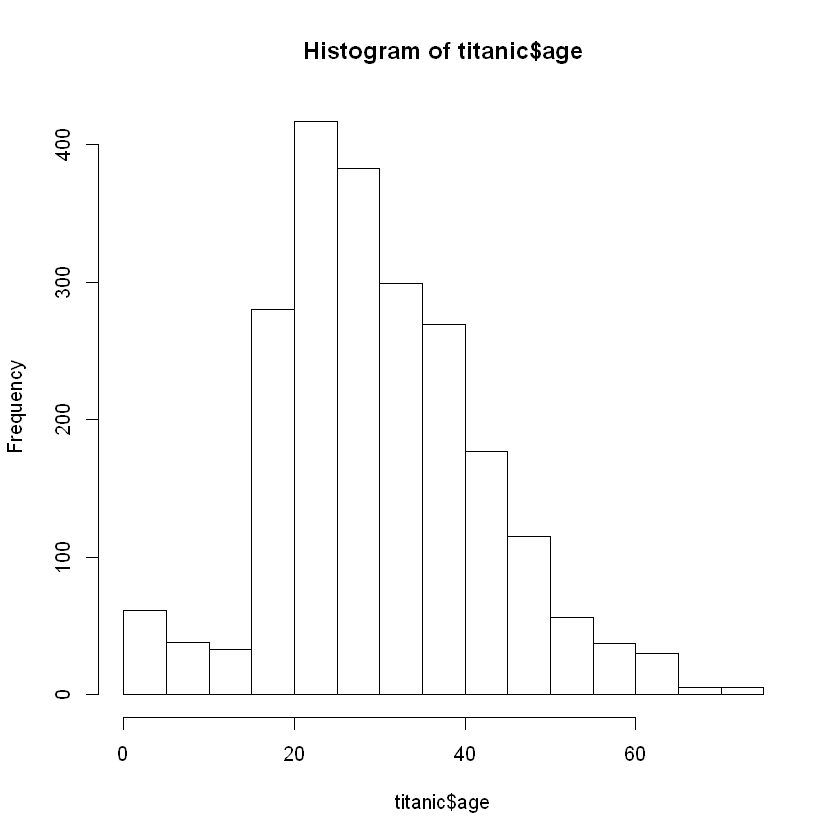

In [5]:
hist(titanic$age)

## Step 2: Were there differences in the age distributions of passengers that survived and perished?

Let's draw another histogram to see.

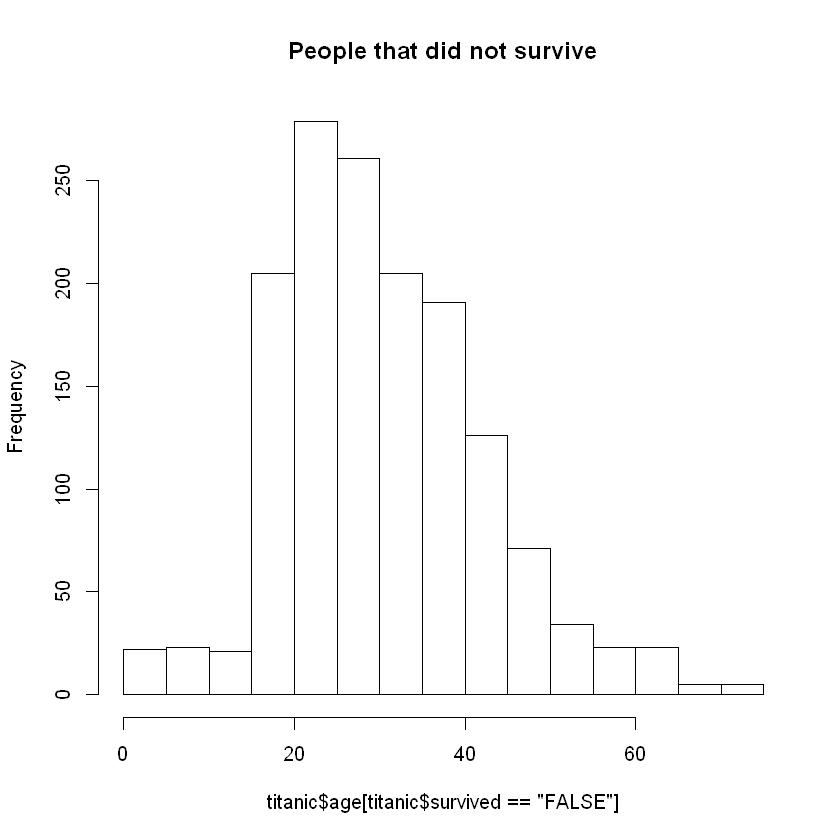

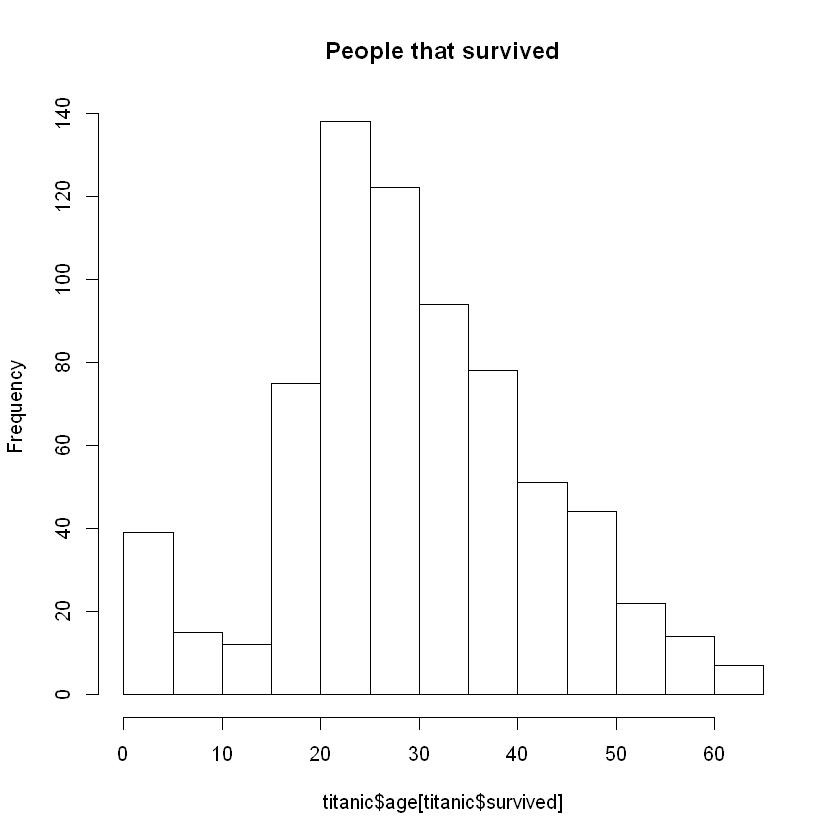

In [6]:
hist(titanic$age[titanic$survived == "FALSE"],
    main = "People that did not survive")

hist(titanic$age[titanic$survived],
    main = "People that survived")

- From the 3 histograms, it can be seen that the average age is 20 and 30.

- R sets histogram bin width automatically, but you can adjust. 

Let's now set our own intervals. Firstly, let's remove NA values.

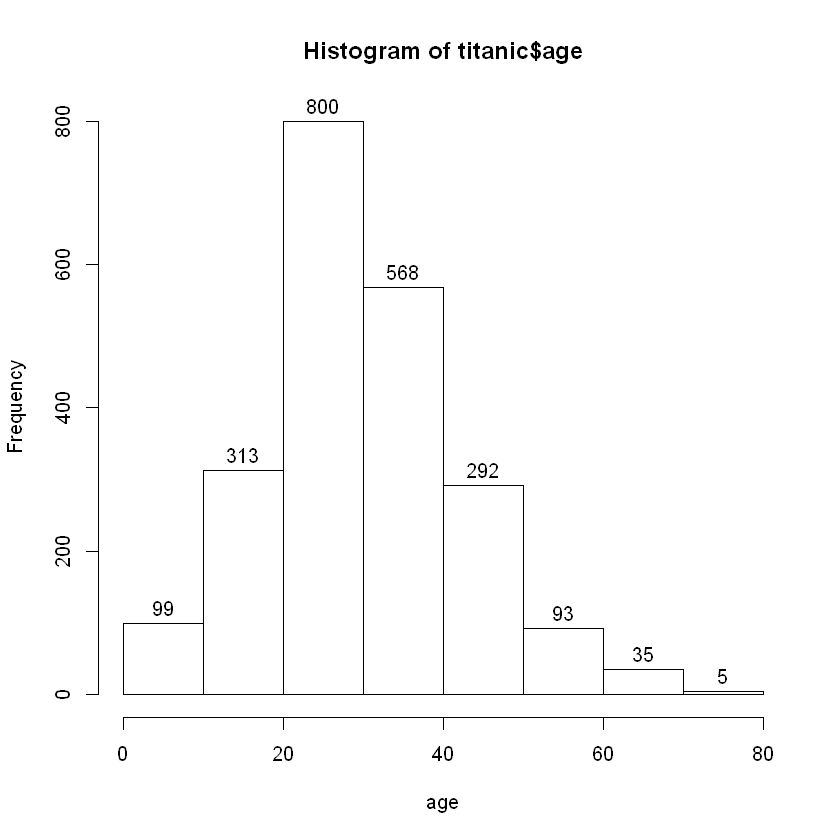

In [7]:
hist(titanic$age, breaks = c(seq(0, 80, 10)),
    labels = TRUE, 
    xlab = "age")

# In this case, labels set to TRUE allows for the exact number to display.
# xlab parameter refers to X Axis Label

## Step 3: Compare the survivors with non survivors and how much their ticket price costs

Let's try using a boxplot here.

In [8]:
# For refresher, here's a summary of the table.
head(titanic)

fam_name,given_name,gender,age,class,survived,ticket,pax_on_tckt,pnd,shl,pnc
ABBING,Anthony,Male,41,3rd,FALSE,5547,1,7,11,0
ABBOTT,Ernest Owen,Male,21,Crew,FALSE,NA,NA,NA,NA,NA
ABBOTT,Eugene Joseph,Male,13,3rd,FALSE,CA2673,3,20,5,0
ABBOTT,Rossmore Edward,Male,16,3rd,FALSE,CA2673,3,20,5,0
ABBOTT,Rhoda Mary 'Rosa',Female,39,3rd,TRUE,CA2673,3,20,5,0
ABELSETH,Kalle (Karen) Marie Kristiane,Female,16,3rd,TRUE,348125,1,7,13,0


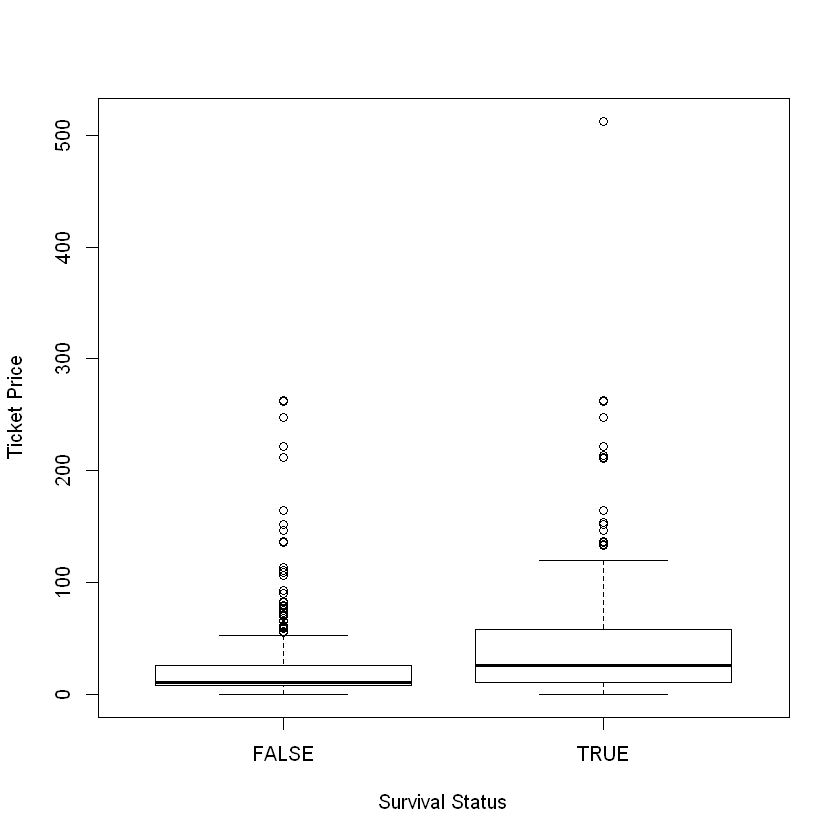

In [9]:
# Let's now create a new table column representing the total price on each ticket

titanic$total_price <- titanic$pnd + titanic$shl/20 + titanic$pnc/240

# Create a boxplot here

boxplot(titanic$total_price ~ titanic$survived,
        ylab = "Ticket Price",
       xlab = "Survival Status")

# One can think of the ~ (tilde) operator as a formula sign. So, capture the meaning of the code without evaluating it

# It can be said: the square root of the total price depends on the category of survived people

## Step 4: Transform the data so that it becomes readable

The boxes are currently impossible to read. One way we can do this is through a square root of the values.

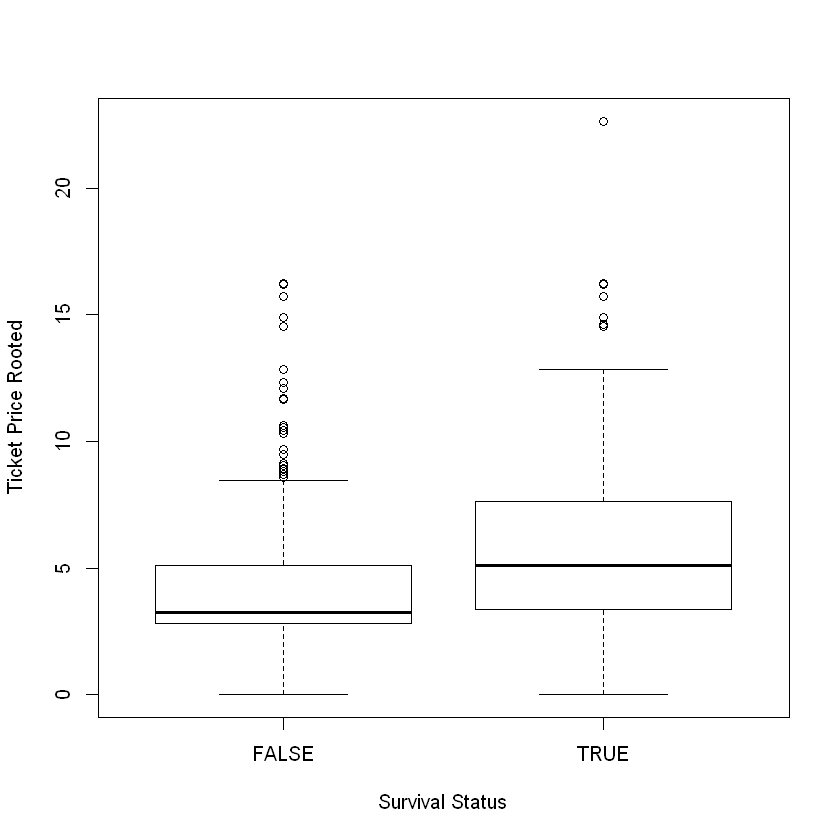

In [10]:
# Create a new column representing the square root of the prices

titanic$total_price_sqrt <- sqrt(titanic$total_price)

# Now create a boxplot with the square root values

boxplot(titanic$total_price_sqrt ~ titanic$survived,
       ylab = "Ticket Price Rooted",
       xlab = "Survival Status")

The boxplots are now easier to read. 

## Step 5: Find the distribution of ages of those who survived, comparing men and women

Do draw another boxplot here to differentiate men and women.

In [11]:
titanic_survivors <- titanic[titanic$survived, ]
head(titanic_survivors)

,fam_name,given_name,gender,age,class,survived,ticket,pax_on_tckt,pnd,shl,pnc,total_price,total_price_sqrt
5,ABBOTT,Rhoda Mary 'Rosa',Female,39,3rd,TRUE,CA2673,3,20,5,0,20.250000,4.500000
6,ABELSETH,Kalle (Karen) Marie Kristiane,Female,16,3rd,TRUE,348125,1,7,13,0,7.650000,2.765863
7,ABELSETH,Olaus Jorgensen,Male,25,3rd,TRUE,348122,1,7,13,0,7.650000,2.765863
9,ABELSON,Anna,Female,28,2nd,TRUE,3381,2,24,0,0,24.000000,4.898979
11,ABI SA'B,Sha'ninah,Female,38,3rd,TRUE,2688,1,7,4,7,7.229167,2.688711
13,ABI-AL-MUNA,Nasif Qasim,Male,27,3rd,TRUE,2699,2,18,15,9,18.787500,4.334455


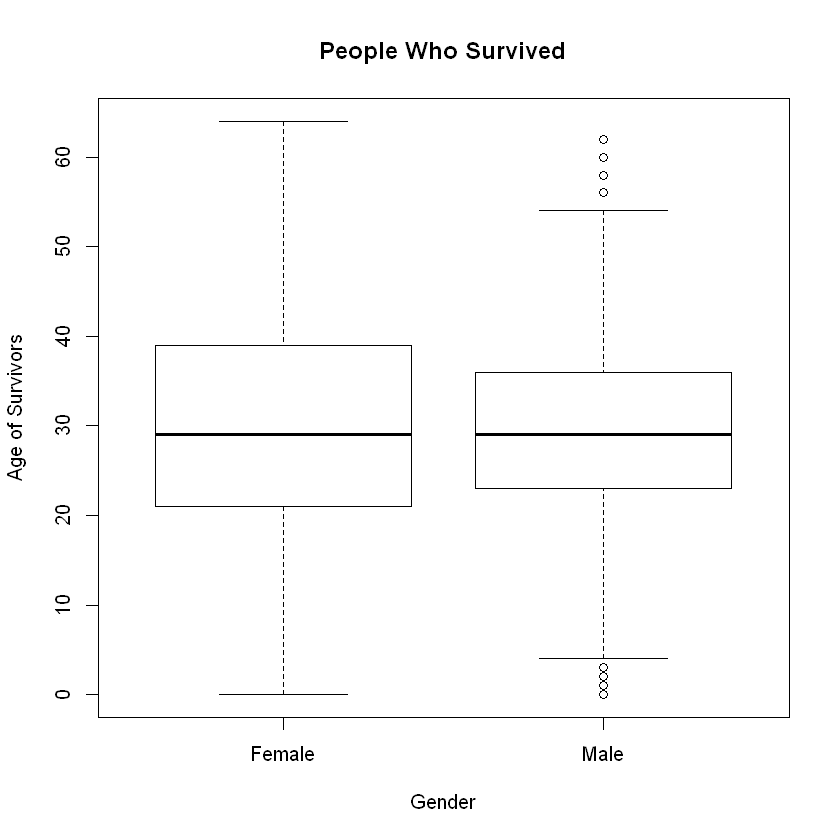

In [12]:
boxplot(titanic_survivors$age ~ titanic_survivors$gender,
       ylab = "Age of Survivors",
       xlab = "Gender",
       main = "People Who Survived")

## Step 6: Find the distribution of survivors' ticket prices by their class of ticket

Yet another boxplot can be drawn here.

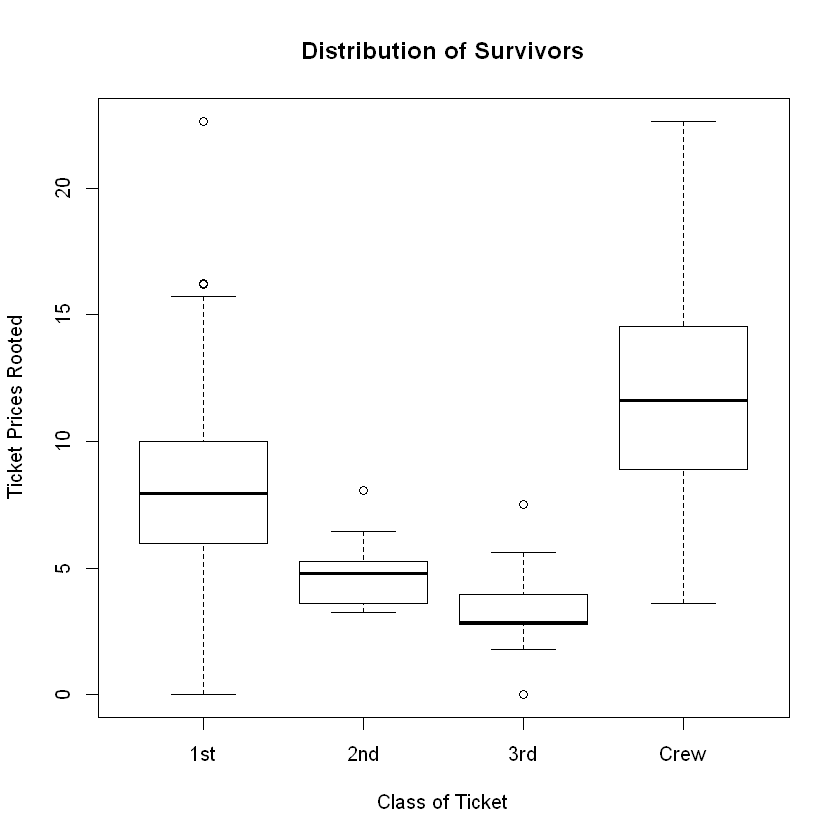

In [13]:
boxplot(titanic_survivors$total_price_sqrt ~ titanic_survivors$class,
       ylab = "Ticket Prices Rooted",
       xlab = "Class of Ticket",
       main = "Distribution of Survivors")

## Step 7: Calculate the actual ticket price per person

You may have noticed that some of the ticket prices seem to be much higher than others. Why might this be the case? Take a look at the 'pax_on_tckt' column in the data.

The 'pax_on_tckt' is actually a total number of people for the ticket, so the ticket price per person should be divided by this column.

Create a new column 'price_per' to calculate the actual price per person and repeat the above.

In [14]:
titanic$price_per <- titanic$total_price / titanic$pax_on_tckt

head(titanic)

fam_name,given_name,gender,age,class,survived,ticket,pax_on_tckt,pnd,shl,pnc,total_price,total_price_sqrt,price_per
ABBING,Anthony,Male,41,3rd,FALSE,5547,1,7,11,0,7.55,2.747726,7.55
ABBOTT,Ernest Owen,Male,21,Crew,FALSE,NA,NA,NA,NA,NA,NA,NA,NA
ABBOTT,Eugene Joseph,Male,13,3rd,FALSE,CA2673,3,20,5,0,20.25,4.500000,6.75
ABBOTT,Rossmore Edward,Male,16,3rd,FALSE,CA2673,3,20,5,0,20.25,4.500000,6.75
ABBOTT,Rhoda Mary 'Rosa',Female,39,3rd,TRUE,CA2673,3,20,5,0,20.25,4.500000,6.75
ABELSETH,Kalle (Karen) Marie Kristiane,Female,16,3rd,TRUE,348125,1,7,13,0,7.65,2.765863,7.65
